In [3]:
import os
import numpy as np
from validation_scripts.mlso_utils import *
from pathlib import Path
os.chdir("Recipes")
import glob

import glob
import numpy as np
import matplotlib.pylab as plt

In [45]:
os.getcwd()

'c:\\ucomp-configuration\\Recipes'

In [46]:
tuning_configs = {}
for tuning_config in glob.glob("../resource/*ini"):
    key = Path(tuning_config).name.split("_")[-1].split(".")[0]
    tuning_configs[key] =  getFilterConfig(tuning_config)
    if len(glob.glob(f"../resource/{key}*.csv")) == 1:
        print(key,f"../resource/{key}*.csv",tuning_config)
        tuning_configs[key]["prefilter"] = np.loadtxt(glob.glob(f"../resource/{key}*.csv")[0],delimiter=",",skiprows =10)
        #for tune_number in range(len(tuning_configs[key]["prefilter"][:,0])):
         #   atlas_value =    atlas[find_nearest(atlas[:,0],tuning_configs[key]["prefilter"][tune_number,0]),1]
         #   tuning_configs[key]["prefilter"][tune_number,1] = atlas_value*tuning_configs[key]["prefilter"][tune_number,1]
        #tuning_configs[key]["prefilter"] = np.array([tuning_configs[key]["prefilter"][:,0],tune_values])
        #print(tuning_configs[key]["prefilter"].shape)

1070 ../resource/1070*.csv ../resource\tuning_calibration_1070.ini
1074 ../resource/1074*.csv ../resource\tuning_calibration_1074.7.ini
1079 ../resource/1079*.csv ../resource\tuning_calibration_1079.8.ini
1083 ../resource/1083*.csv ../resource\tuning_calibration_1083.0.ini
530 ../resource/530*.csv ../resource\tuning_calibration_530.3.ini
637 ../resource/637*.csv ../resource\tuning_calibration_637.4.ini
656 ../resource/656*.csv ../resource\tuning_calibration_656.3.ini
670 ../resource/670*.csv ../resource\tuning_calibration_670.2.ini
691 ../resource/691*.csv ../resource\tuning_calibration_691.8.ini
706 ../resource/706*.csv ../resource\tuning_calibration_706.2.ini
761 ../resource/761*.csv ../resource\tuning_calibration_761.2.ini
789 ../resource/789*.csv ../resource\tuning_calibration_789.4.ini
802 ../resource/802*.csv ../resource\tuning_calibration_802.4.ini
991 ../resource/991*.csv ../resource\tuning_calibration_991.3.ini


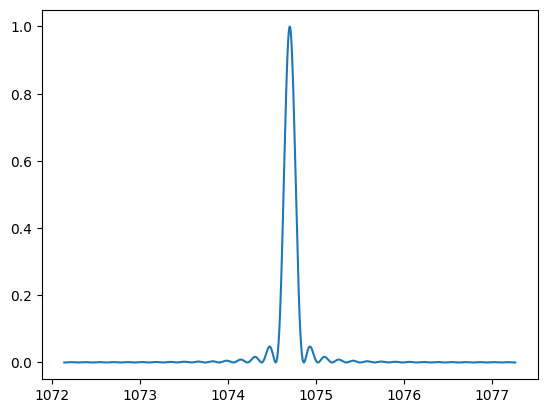

In [8]:
plt.plot(*createStages(filterConfig=tuning_configs["1074"],wavelength=1074.7))

In [13]:

def convolve_filters(wave,config,cam="onband",cont="both"):
    tuning_wave,tuning_trans = createStages(filterConfig=config,wavelength=wave,cam=cam,cont=cont)
    for i in range(len(tuning_wave)):
        tuning_trans[i] = tuning_trans[i]*config["prefilter"][find_nearest(config["prefilter"][:,0],tuning_wave[i]),1]
    return tuning_wave,tuning_trans

In [11]:
np.sum(createStages(filterConfig=tuning_configs["1074"],wavelength=1074.7)[1])

np.float64(156.25000000697682)

In [12]:
np.sum(createStages(filterConfig=tuning_configs["1074"],wavelength=1074.7,cam="offband")[1])

np.float64(156.25000000697685)

In [23]:
np.sum(convolve_filters(1074.7,config=tuning_configs["1074"],cam="onband")[1])/np.sum(convolve_filters(1074.7,config=tuning_configs["1074"],cam="offband")[1])

np.float64(1.4043619805963796)

In [20]:
np.sum(convolve_filters(1074.7,config=tuning_configs["1074"],cam="offband")[1])

np.float64(5105.187554863249)

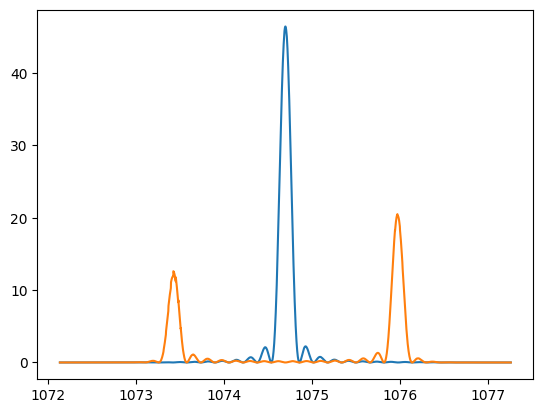

In [22]:
plt.plot(*convolve_filters(1074.7,config=tuning_configs["1074"],cam="onband"))
plt.plot(*convolve_filters(1074.7,config=tuning_configs["1074"],cam="offband"))

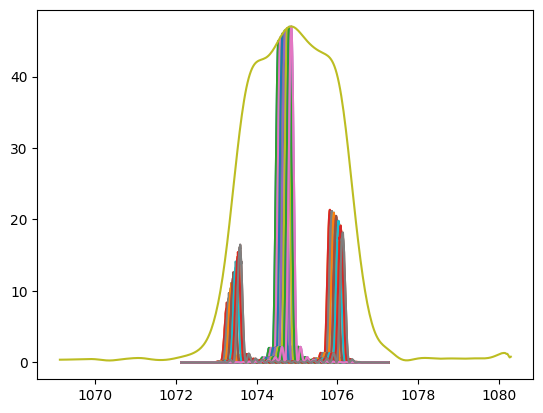

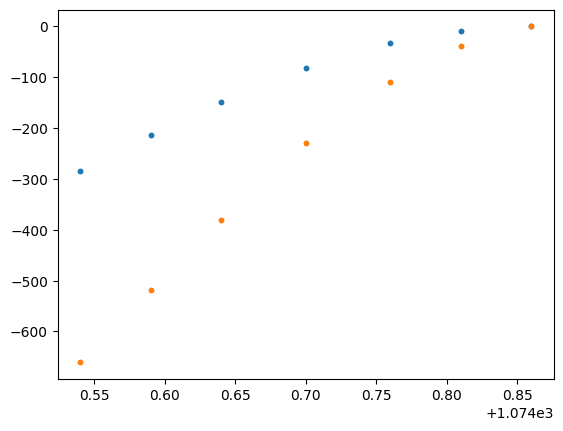

In [110]:
wave_list_ucomp = sorted([1074.54,
 1074.59,
 1074.64,
 1074.7,
 1074.76,
 1074.81,
 1074.86,
 1074.54,
 1074.59,
 1074.64,
 1074.7,
 1074.76,
 1074.81,
 1074.86])
on = []
off = []
#wave_list_ucomp = sorted([1074.54, 1074.59, 1074.64, 1074.7, 1074.76, 1074.81, 1074.86])
for wave in wave_list_ucomp:
    on.append(np.sum(convolve_filters(wave,config=tuning_configs["1074"],cam="onband")[1]))
    off.append(np.sum(convolve_filters(wave,config=tuning_configs["1074"],cam="offband")[1]))
    plt.plot(*convolve_filters(wave,config=tuning_configs["1074"],cam="onband"))
    plt.plot(*convolve_filters(wave,config=tuning_configs["1074"],cam="offband"))
plt.plot(tuning_configs["1074"]['prefilter'][:,0],tuning_configs["1074"]['prefilter'][:,1])
plt.figure()
plt.plot(wave_list_ucomp,on-np.max(on),".")
plt.plot(wave_list_ucomp,off-np.max(off),".")

In [113]:
np.polyfit(wave_list_ucomp,on,1),np.polyfit(wave_list_ucomp,off,1)

(array([ 9.10860614e+02, -9.71761045e+05]),
 array([ 2.11565092e+03, -2.26863164e+06]))

In [101]:
ratio = []
#wave_list_ucomp = sorted([1074.54, 1074.59, 1074.64, 1074.7, 1074.76, 1074.81, 1074.86])
for wave in wave_list_ucomp:
    ratio.append(np.sum(convolve_filters(wave,config=tuning_configs["1074"],cam="onband")[1])/np.sum(convolve_filters(wave,config=tuning_configs["1074"],cam="offband")[1]))

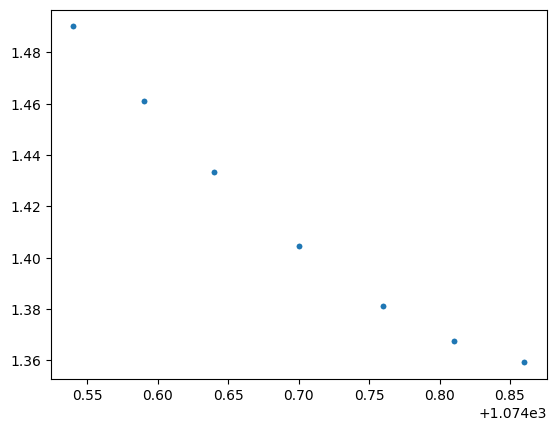

In [102]:
plt.plot(np.array(wave_list_ucomp),np.array(ratio),".",label="ucomp")
#plt.plot(wavelist,compratio,".",label="comp")
#plt.legend()

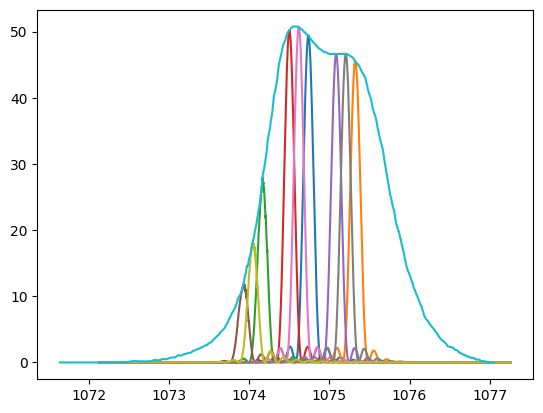

In [54]:
plt.plot(*convolve_filters(1074.74,config=tuning_configs["1070"],cam="onband"))
plt.plot(*convolve_filters(1074.74+.585,config=tuning_configs["1070"],cam="onband"))
plt.plot(*convolve_filters(1074.74-.585,config=tuning_configs["1070"],cam="onband"))

plt.plot(*convolve_filters(1074.5,config=tuning_configs["1070"],cam="onband"))
plt.plot(*convolve_filters(1074.5+.585,config=tuning_configs["1070"],cam="onband"))
plt.plot(*convolve_filters(1074.5-.585,config=tuning_configs["1070"],cam="onband"))

plt.plot(*convolve_filters(1074.62,config=tuning_configs["1070"],cam="onband"))
plt.plot(*convolve_filters(1074.62+.585,config=tuning_configs["1070"],cam="onband"))
plt.plot(*convolve_filters(1074.62-.585,config=tuning_configs["1070"],cam="onband"))

plt.plot(tuning_configs["1070"]['prefilter'][:,0],tuning_configs["1070"]['prefilter'][:,1])

In [123]:
compratio = []
comp_off = []
comp_on = []
#wavelist = sorted([1074.5,1074.62,1074.74])
for wave in wave_list_ucomp:
    comp_on.append(np.sum(convolve_filters(wave,config=tuning_configs["1070"],cam="onband")[1]))
    off1 = np.sum(convolve_filters(wave-.585,config=tuning_configs["1070"],cam="onband")[1])
    off2 = np.sum(convolve_filters(wave+.585,config=tuning_configs["1070"],cam="onband")[1])
    #compratio.append(on/(off1/2+off2/2))
    comp_off.append(off1/2+off2/2)

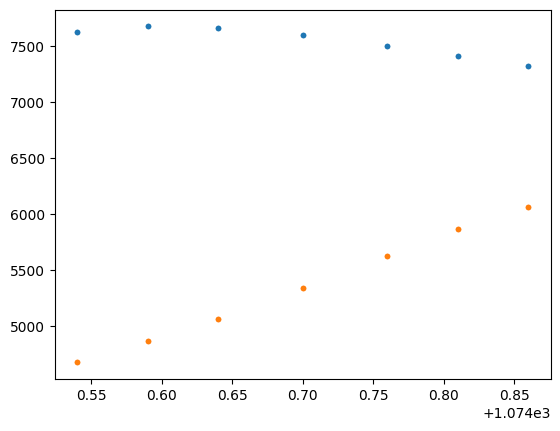

In [127]:

plt.plot(wave_list_ucomp,comp_on,".")
plt.plot(wave_list_ucomp,comp_off,".")

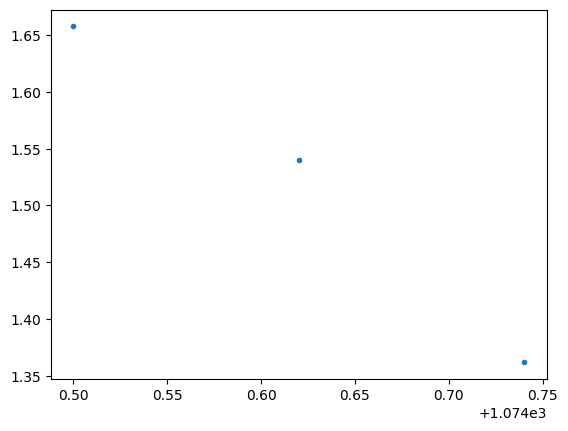

In [96]:
plt.plot(wavelist,compratio,".")

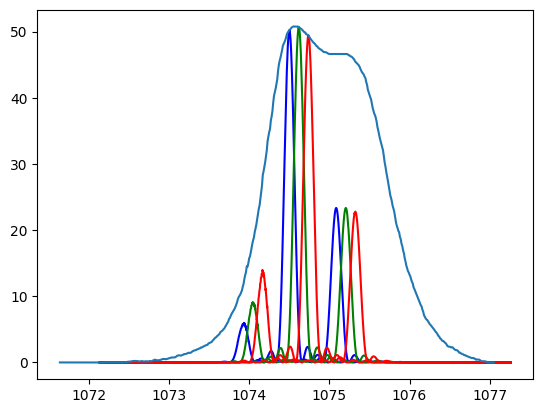

In [97]:
colors = ["b","g","r","y","c","m","k"]
for i, wave in enumerate(wavelist):
    plt.plot(*convolve_filters(wave,config=tuning_configs["1070"],cam="onband"),color=colors[i])
    
    tuning_waves,tuning_trans=convolve_filters(wave + .585,config=tuning_configs["1070"],cam="onband")
    #plt.plot(tuning_waves,tuning_trans/2)
    tuning_waves2,tuning_trans2=convolve_filters(wave - .585,config=tuning_configs["1070"],cam="onband")
    plt.plot(tuning_waves,(tuning_trans+tuning_trans2)/2,color=colors[i])


plt.plot(tuning_configs["1070"]['prefilter'][:,0],tuning_configs["1070"]['prefilter'][:,1])

In [84]:
wavelist

[1074.03, 1074.38, 1074.5, 1074.62, 1074.74, 1074.86, 1075.21]